In [1]:
# SVM : Support Vector Machine
# SVR : Support Vector Regression
# SVC : Support Vector Classifier

In [2]:
# Hyperplane : is a line that optimally divides all the data points in n number of classes
# SVR hs to do this

# The line should be in such a way that the point nearest to the line from each class
# should have the same distance to the line

In [3]:
# Kernel is a function that converts the lower dimensional data points into higher
# dimensional data points

# Ex : If the points are in the form of a circle like
#  inner circle -> category 1
#  outer circle -> category 2
# It is not possible to divide them using a circle as it is only possibel to draw a line or a polynomial
# Hence it uses Kernel until it is possible to divide them into different categories

# Some of the kernels
# Polynomial
# Sigmoid
# Gaussian
# rbf

In [4]:
# SVR : 
# Collect the training set
# Choose the kernel (Perform the HPT)
# Model
# Train the model
# Performance

In [5]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
# Problem Statement
# In this data, we have one independent variable (Features) "Hours of Study" and one 
# dependent variable(Target) "Marks". You have to train a SVR model to understand the 
# relationship between the Hours of Study and Marks of the student to predict the student's
# marks based on their number of hours dedicated to studies.

In [7]:
# Importing the dataset
url = "https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv"
df = pd.read_csv(url)

In [8]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours of Study  100 non-null    float64
 1   Marks           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [10]:
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


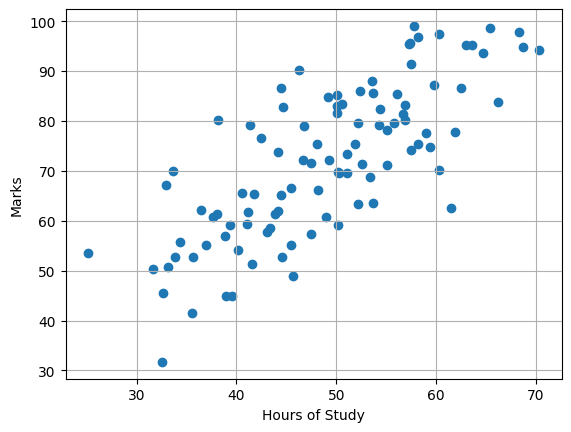

In [11]:
plt.scatter(df['Hours of Study'], df['Marks'])
plt.xlabel("Hours of Study")
plt.ylabel("Marks")
plt.grid()

In [12]:
df.rename(columns = {'Hours of Study' : 'Hours'}, inplace = True)

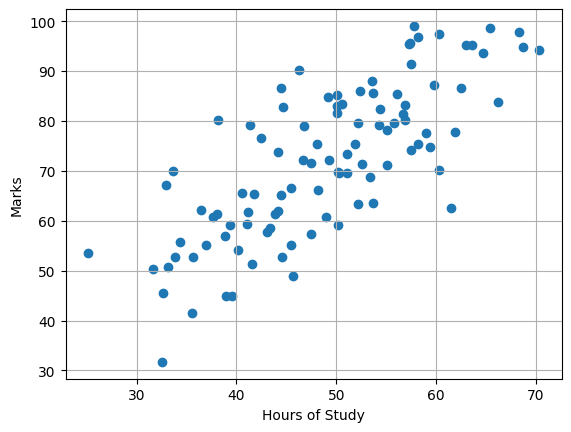

In [13]:
plt.scatter(df.Hours, df.Marks)
plt.xlabel("Hours of Study")
plt.ylabel("Marks")
plt.grid()

<Axes: >

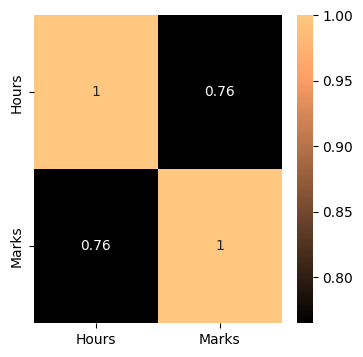

In [14]:
# Heatmap for correlation
plt.figure(figsize = (4, 4))
sns.heatmap(df.corr(), annot = True, cmap = 'copper')

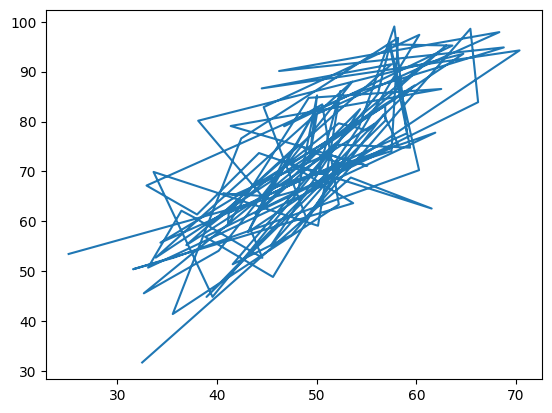

In [15]:
plt.plot(df.Hours, df.Marks)
# Not at all beneficial

In [16]:
# Feature Scaling : scales down all the values between -1 and 1
#     Standardization
#     Normalisation

In [17]:
from sklearn.preprocessing import StandardScaler 

In [18]:
# X = np.array(df.Hours)
# y = np.array(df.Marks)
#             or
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [19]:
df.iloc[:,-1].values

array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
       78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
       55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
       60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319,
       83.87856466, 98.5912173 , 57.25181946, 51.39174408, 75.38065167,
       74.76556403, 95.45505292, 95.22936602, 79.05240617, 83.43207142,
       63.35879032, 41.4128853 , 76.61734128, 96.76956643, 74.08413012,
       66.58814441, 77.76848242, 50.71958891, 62.12457082, 60.81024665,
       52.68298337, 58.56982472, 82.90598149, 61.4247098 , 95.2441528 ,
       45.57058882, 54.0840548 , 87.99445276, 52.72549438, 93.57611869,
       80.16627545, 65.10171157, 65.56230126, 65.28088692, 73.43464155,
       71.13972786, 79.10282968, 86.52053844, 84.74269781, 59.35885025,
       61.68403752, 69.84760416, 86.09829121, 59.10883927, 69.89968164,
       44.86249071, 85.49806778, 95.53668685, 70.25193442, 52.72

In [20]:
stanscale = StandardScaler()

In [21]:
X = stanscale.fit_transform(X.reshape(-1, 1))
y = stanscale.fit_transform(y.reshape(-1, 1))

In [22]:
X
# All the values are scaled from -1 to 1

array([[-1.69692744e+00],
       [ 4.60783817e-01],
       [ 1.29641497e+00],
       [-1.52894871e-01],
       [ 1.11934400e+00],
       [ 6.37672702e-01],
       [ 3.35493359e-01],
       [-9.96004115e-01],
       [-8.79915004e-02],
       [ 3.70370068e-01],
       [-3.64898398e-01],
       [ 5.56151537e-01],
       [-4.94383049e-01],
       [ 9.49740196e-01],
       [ 8.01118494e-01],
       [-2.52939962e-04],
       [-4.40436632e-01],
       [ 1.16926591e+00],
       [-3.44386604e-01],
       [-1.04578477e+00],
       [ 1.77689413e+00],
       [ 1.69710419e+00],
       [-1.52320603e-01],
       [-7.61297225e-01],
       [ 2.97688891e-01],
       [ 1.07372557e+00],
       [ 8.61215827e-01],
       [ 1.51143924e+00],
       [-2.28998849e-01],
       [ 1.64827489e-01],
       [ 3.36751351e-01],
       [-1.38081742e+00],
       [-6.72528769e-01],
       [ 9.49334875e-01],
       [ 8.81266735e-01],
       [-3.62753460e-01],
       [ 1.33414261e+00],
       [-1.63593389e+00],
       [-1.2

In [23]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [24]:
X_train.shape

(80, 1)

In [25]:
# Define the model
from sklearn.svm import SVR

In [26]:
model = SVR(kernel = 'rbf')

# Check when to use which kernel

In [27]:
model.fit(X_train, y_train)

C:\Users\LOHITHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred

array([-0.76947139,  0.62495329, -0.36605346, -1.26283815,  0.57381597,
       -0.1185472 , -0.75664008, -0.40417142, -0.99623181,  0.95262628,
        1.07387222,  0.35030893, -0.56328734, -0.52093818,  0.07543078,
        1.22551728,  1.33758452,  0.67596748, -0.56967027, -0.64786557])

In [32]:
# y_pred = stanscale.inverse_transform(y_pred)

# Reshape y_pred to be a 2D array
y_pred_reshaped = y_pred.reshape(-1, 1)

# Apply inverse transform
y_pred_inverse = stanscale.inverse_transform(y_pred_reshaped)

In [43]:
# # Reshape y_pred to be a 2D array
# y_test_reshaped = y_test.reshape(-1, 1)

# # Apply inverse transform
# y_test_inverse = stanscale.inverse_transform(y_test_reshaped)

In [33]:
y_pred_inverse

array([[60.39764577],
       [81.48677868],
       [66.49889641],
       [52.93601862],
       [80.71338315],
       [70.24215505],
       [60.59170512],
       [65.92240434],
       [56.96814488],
       [86.44247075],
       [88.27618157],
       [77.33308614],
       [63.51595177],
       [64.15643611],
       [73.17585776],
       [90.56964555],
       [92.26453877],
       [82.25831189],
       [63.41941707],
       [62.23679956]])

In [46]:
y_test = stanscale.inverse_transform(y_test)

In [47]:
# y_test_inverse

Text(0.5, 1.0, 'Actual Marks V/s Predicted Marks')

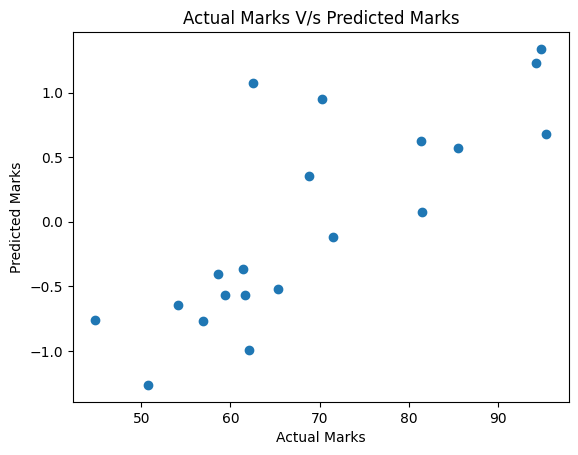

In [36]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Actual Marks V/s Predicted Marks')

In [37]:
model.predict([[5]])

array([-0.03507798])

In [38]:
stanscale.inverse_transform(model.predict([[10]]))

ValueError: Expected 2D array, got 1D array instead:
array=[-0.03514876].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [39]:
model.score(X_test, y_test)

-22.099949752331796

In [41]:
r2_score(y_test, y_pred)

-22.099949752331796

In [42]:
mean_squared_error(y_test, y_pred)

4967.007136956301